In [1]:
import xarray as xr
import cartopy.crs as ccrs
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from pcv.io import majority_class_1_landuse, read_clim_mask, get_climate_shape_feature
from pcv.process import select_data
from pcv.process import mask_crop_forest
from pcv.cfg import IPCC_REGION_SHPFILE, IPCC_ACRONYM

In [2]:
t2m_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_t2m_v3.nc"
tp_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_tp_v3.nc"
ssrd_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_ssrd_v3.nc"
lai_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_lai_v3.nc"
swvlall_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_swvlall_v3.nc"
vpd_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_vpd_v3.nc"
sd_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_sd_v3.nc"

t2m_data = xr.open_dataset(t2m_path)
tp_data = xr.open_dataset(tp_path)
ssrd_data = xr.open_dataset(ssrd_path)
swvlall_data = xr.open_dataset(swvlall_path)
vpd_data = xr.open_dataset(vpd_path)
sd_data = xr.open_dataset(sd_path)
lai_data = xr.open_dataset(lai_path).rename({"lat":"latitude", "lon":"longitude"})
lai_data = lai_data.reindex(lat = list(reversed(lai_data.latitude)))

In [3]:
t2m_winter = select_data(t2m_data,  "winter")
t2m_spring = select_data(t2m_data,  "spring")
t2m_summer = select_data(t2m_data,  "summer")

tp_winter = select_data(tp_data,  "winter")
tp_spring = select_data(tp_data,  "spring")
tp_summer = select_data(tp_data,  "summer")

ssrd_winter = select_data(ssrd_data,  "winter")
ssrd_spring = select_data(ssrd_data,  "spring")
ssrd_summer = select_data(ssrd_data,  "summer")

lai_winter = select_data(lai_data,  "winter")
lai_spring = select_data(lai_data,  "spring")
lai_summer = select_data(lai_data,  "summer")

swvlall_winter = select_data(swvlall_data,  "winter")
swvlall_spring = select_data(swvlall_data,  "spring")
swvlall_summer = select_data(swvlall_data,  "summer")

vpd_winter = select_data(vpd_data,  "winter")
vpd_spring = select_data(vpd_data,  "spring")
vpd_summer = select_data(vpd_data,  "summer")

sd_winter = select_data(sd_data,  "winter")
sd_spring = select_data(sd_data,  "spring")
sd_summer = select_data(sd_data,  "summer")

xtreme = "low"
if xtreme=="low":
    t = lai_summer.quantile(0.1, dim="time")
    lai_summer = xr.where(lai_summer<t, 1, 0)
elif xtreme == "high":
    t = lai_summer.quantile(0.9, dim="time")
    lai_summer = xr.where(lai_summer>t, 1, 0)


/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, 

In [17]:
lon = lai_data.longitude.values
lat = lai_data.latitude.values

In [18]:
lu_mc_1 = majority_class_1_landuse(lon=lon, lat=lat)
mask_crop, mask_forest = mask_crop_forest(lu_mc_1)

In [19]:
shape_feature_list = get_climate_shape_feature()

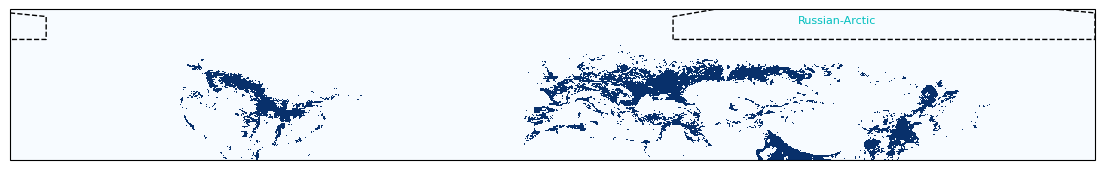

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (14, 8), 
                subplot_kw={'projection': ccrs.PlateCarree()})

ax.pcolormesh(np.linspace(-180, 180, 1441),np.linspace(25,75, 201), mask_crop, snap=True, cmap = "Blues")

for name, shape_feature, centroid in shape_feature_list:
    # if 75>centroid[1]>15:
    if name in ["Russian-Arctic"]: #["W.C.Asia", "E.C.Asia", "W.Siberia", "Tibetan-Plateau"]: 
        ax.add_feature(shape_feature, linestyle = "--", label = name)
        ax.set_extent((-180, 180, 25, 75), crs=ccrs.PlateCarree())
        ax.text(centroid[0], centroid[1], name, color='c', size=8, ha='center', va='center', wrap = True,  transform=ccrs.PlateCarree())

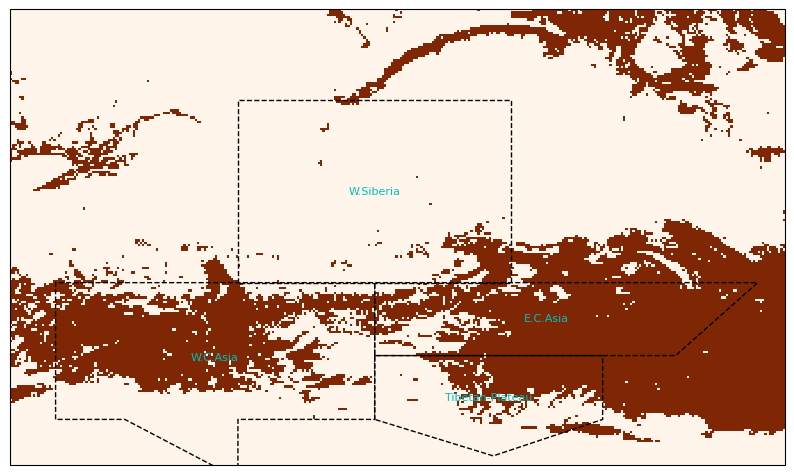

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8), 
                subplot_kw={'projection': ccrs.PlateCarree()})

ax.pcolormesh(np.linspace(-180, 180, 1441),np.linspace(25,75, 201), np.flip(mask_forest, axis=0), snap=True, cmap = "Oranges")

for name, shape_feature, centroid in shape_feature_list:
    # if 75>centroid[1]>15:
    if name in ["W.C.Asia", "E.C.Asia", "W.Siberia", "Tibetan-Plateau"]: 
        ax.add_feature(shape_feature, linestyle = "--", label = name)
        ax.set_extent((35, 120, 25, 75), crs=ccrs.PlateCarree())
        ax.text(centroid[0], centroid[1], name, color='c', size=8, ha='center', va='center', wrap = True,  transform=ccrs.PlateCarree())

In [22]:


def mask_var(var, region, crs, mask_crop, mask_forest, winter=False):
    
    var.rio.write_crs("epsg:4326", inplace=True)
    var = var.rio.clip(region, crs)
    if "t2m" == var.name:
        global TOT_PIXEL
        TOT_PIXEL = var.notnull().sum(["latitude", "longitude"]).mean("time").values
    crop = var.where(mask_crop==1)
    forest = var.where(mask_forest==1)
    
    if winter:
        base_year = 1970+1
    else:
        base_year = 1970
    crop.coords["time"] = [time.astype('datetime64[Y]').astype(int) + base_year for time in crop.time.values]
    forest.coords["time"] = [time.astype('datetime64[Y]').astype(int) + base_year for time in forest.time.values]

    return crop, forest

In [28]:
ds_path = "/data/compoundx/anand/PCV/data/"
version = 3

shp = gpd.read_file(IPCC_REGION_SHPFILE)


for i, name in enumerate(shp.Name):
    if name in IPCC_ACRONYM:
    # if name == "N.Central-America":


        t2m_w_crop, t2m_w_forest = mask_var(t2m_winter, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest, winter=True)
        t2m_sp_crop, t2m_sp_forest = mask_var(t2m_spring, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)
        t2m_su_crop, t2m_su_forest = mask_var(t2m_summer, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)

        tp_w_crop, tp_w_forest = mask_var(tp_winter, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest, winter=True)
        tp_sp_crop, tp_sp_forest = mask_var(tp_spring, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)
        tp_su_crop, tp_su_forest = mask_var(tp_summer, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)

        sm_w_crop, sm_w_forest = mask_var(swvlall_winter, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest, winter=True)
        sm_sp_crop, sm_sp_forest = mask_var(swvlall_spring, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)
        sm_su_crop, sm_su_forest = mask_var(swvlall_summer, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)

        sd_w_crop, sd_w_forest = mask_var(sd_winter, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest, winter=True)
        sd_sp_crop, sd_sp_forest = mask_var(sd_spring, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)
        sd_su_crop, sd_su_forest = mask_var(sd_summer, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)
        
        lai_w_crop, lai_w_forest = mask_var(lai_winter, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest, winter=True)
        lai_sp_crop, lai_sp_forest = mask_var(lai_spring, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)
        lai_su_crop, lai_su_forest = mask_var(lai_summer, region=shp.iloc[i], crs = shp.crs, mask_crop=mask_crop, mask_forest = mask_forest)
    
        x_crop = xr.Dataset({
            "t2m_w_crop": t2m_w_crop, 
            "tp_w_crop": tp_w_crop, 
            "sm_w_crop": sm_w_crop, 
            "sd_w_crop": sd_w_crop, 
            "t2m_sp_crop": t2m_sp_crop, 
            "tp_sp_crop": tp_sp_crop, 
            "sm_sp_crop": sm_sp_crop, 
            "sd_sp_crop": sd_sp_crop, 
            "lai_sp_crop": lai_sp_crop, 
            "t2m_su_crop": t2m_su_crop, 
            "tp_su_crop": tp_su_crop, 
            "sm_su_crop": sm_su_crop, 
            "sd_su_crop": sd_su_crop, 
            "lai_su_crop": lai_su_crop
        })

        x_forest = xr.Dataset({
            "t2m_w_forest": t2m_w_forest, 
            "tp_w_forest": tp_w_forest,
            "sm_w_forest": sm_w_forest, 
            "sd_w_forest": sd_w_forest,
            "t2m_sp_forest": t2m_sp_forest,
            "tp_sp_forest": tp_sp_forest,
            "sm_sp_forest": sm_sp_forest,
            "sd_sp_forest": sd_sp_forest,
            "lai_sp_forest": lai_sp_forest,
            "t2m_su_forest": t2m_su_forest,
            "tp_su_forest": tp_su_forest,
            "sm_su_forest": sm_su_forest,
            "sd_su_forest": sd_su_forest, 
            "lai_su_forest": lai_su_forest,
        })
        
        if x_forest.longitude.shape[0] != 0:
            tot_pixel_f = TOT_PIXEL
            f_pixel = x_forest.notnull()["t2m_w_forest"][0, :, :].sum()
            print(f"Total pixel: {tot_pixel_f}")
            x_forest.to_netcdf(f"{ds_path}forest_data/{xtreme}/"+f"forest_{name}_v{version}.nc") 
            print(f"Forest frac: {f_pixel/tot_pixel_f*100:.2f}")

        if x_crop.longitude.shape[0] != 0:
            tot_pixel_c = TOT_PIXEL
            c_pixel = x_crop.notnull()["t2m_w_crop"][0, :, :].sum()
            print(f"Total pixel: {tot_pixel_c}")
            x_crop.to_netcdf(f"{ds_path}crop_data/{xtreme}/"+f"crop_{name}_v{version}.nc")
            print(f"Crop frac: {c_pixel/np.sum(tot_pixel_c)*100:.2f}")


/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/rasterio/features.py:328: ShapeSkipWarning: Invalid or empty shape CENTRAL-AMERICA at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/rasterio/features.py:328: ShapeSkipWarning: Invalid or empty shape Land at index 1 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/rasterio/features.py:328: ShapeSkipWarning: Invalid or empty shape N.Central-America at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/rasterio/features.py:328: ShapeSkipWarning: Invalid or emp

Total pixel: 2876.0
Forest frac: 11.54
Total pixel: 2876.0
Crop frac: 3.55


/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/xarray/core/duck_array_ops.py:203: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


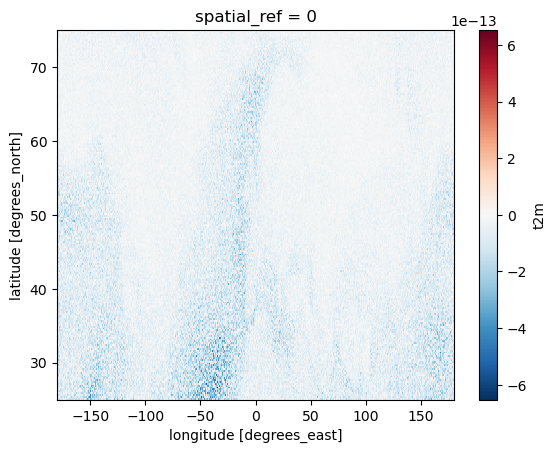

In [25]:
t2m_winter.mean("time").plot()

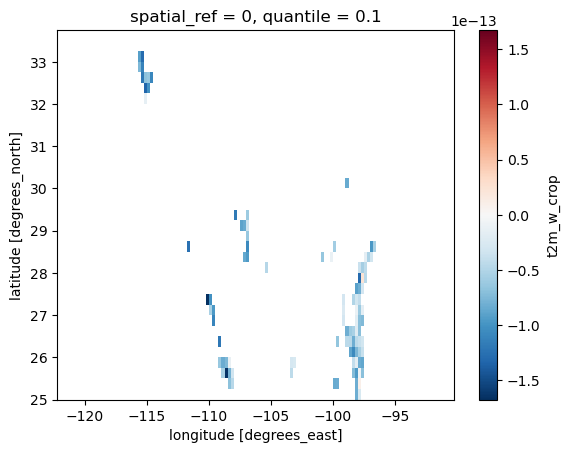

In [27]:
x_crop["t2m_w_crop"].mean("time").plot()
